# 케라스 다양한 학습 기술

- 과대적합, 과소적합을 막기 위한 방법들
  - 모델의 크기 축소
  
  - 초기화

  - 옵티마이저

  - 배치 정규화

  - 규제화

### 모델의 크기 축소
- 가장 단순한 방법

- 모델의 크기를 줄인다는 것은 **학습 파라미터의 수를 줄이는 것**

#### 데이터 준비
- 설명을 위한 코드

In [3]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_seq(seqs, dim=10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.
        
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 2가지의 모델 설정

In [4]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
model_1 = Sequential([Dense(16, activation='relu', input_shape=(10000, ), name='input'),
                      Dense(16, activation='relu', name='hidden'),
                      Dense(1, activation='sigmoid', name='output')])

In [6]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                160016    
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_2 = Sequential([Dense(7, activation='relu', input_shape=(10000, ), name='input2'),
                      Dense(7, activation='relu', name='hidden2'),
                      Dense(1, activation='sigmoid', name='output2')])

In [8]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input2 (Dense)              (None, 7)                 70007     
                                                                 
 hidden2 (Dense)             (None, 7)                 56        
                                                                 
 output2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 70,071
Trainable params: 70,071
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_1.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

model_2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

#### 2개의 모델 학습

In [10]:
model_1_hist = model_1.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 26ms/step - loss: 0.4340 - acc: 0.8217 - val_loss: 0.3223 - val_acc: 0.8825
Epoch 2/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2488 - acc: 0.9129 - val_loss: 0.2957 - val_acc: 0.8840
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1936 - acc: 0.9307 - val_loss: 0.2838 - val_acc: 0.8866
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1658 - acc: 0.9409 - val_loss: 0.3273 - val_acc: 0.8730
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1413 - acc: 0.9499 - val_loss: 0.3174 - val_acc: 0.8784
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1266 - acc: 0.9558 - val_loss: 0.3464 - val_acc: 0.8746
Epoch 7/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1115 - acc: 0.9618 - val_loss: 0.3658 - val_acc: 0.8697
Epoch 8/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1023 - a

In [11]:
model_2_hist = model_2.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 24ms/step - loss: 0.5274 - acc: 0.8012 - val_loss: 0.4201 - val_acc: 0.8634
Epoch 2/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3298 - acc: 0.8992 - val_loss: 0.3219 - val_acc: 0.8850
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2448 - acc: 0.9208 - val_loss: 0.2870 - val_acc: 0.8902
Epoch 4/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1998 - acc: 0.9330 - val_loss: 0.2867 - val_acc: 0.8858
Epoch 5/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1710 - acc: 0.9423 - val_loss: 0.2837 - val_acc: 0.8874
Epoch 6/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1476 - acc: 0.9514 - val_loss: 0.2919 - val_acc: 0.8858
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1289 - acc: 0.9588 - val_loss: 0.3149 - val_acc: 0.8789
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1139 - a

#### 비교

In [12]:
epochs = range(1, 21)
model_1_val_loss = model_1_hist.history['val_loss']
model_2_val_loss = model_2_hist.history['val_loss']

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-white')

model_2 (더 작은 모델)이 '조금 더 나중에' 과대적합 발생

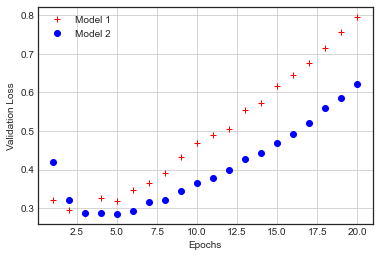

In [84]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 모델의 크기 축소 (2)


#### 모델 구성

In [15]:
model_3 = Sequential([Dense(1024, activation='relu', input_shape=(10000, ), name='input3'),
                      Dense(1024, activation='relu', name='hidden3'),
                      Dense(1, activation='sigmoid', name='output3')])

model_3.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input3 (Dense)              (None, 1024)              10241024  
                                                                 
 hidden3 (Dense)             (None, 1024)              1049600   
                                                                 
 output3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습
- 시간 소요

In [16]:
model_3_hist = model_3.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 8s 164ms/step - loss: 0.5510 - acc: 0.7944 - val_loss: 0.3998 - val_acc: 0.8175
Epoch 2/20
49/49 [==============================] - 7s 147ms/step - loss: 0.2211 - acc: 0.9122 - val_loss: 0.2985 - val_acc: 0.8808
Epoch 3/20
49/49 [==============================] - 7s 151ms/step - loss: 0.1205 - acc: 0.9570 - val_loss: 0.3664 - val_acc: 0.8773
Epoch 4/20
49/49 [==============================] - 7s 146ms/step - loss: 0.0751 - acc: 0.9818 - val_loss: 0.5117 - val_acc: 0.8666
Epoch 5/20
49/49 [==============================] - 7s 144ms/step - loss: 0.1099 - acc: 0.9874 - val_loss: 0.4501 - val_acc: 0.8809
Epoch 6/20
49/49 [==============================] - 7s 142ms/step - loss: 0.0010 - acc: 0.9999 - val_loss: 0.7434 - val_acc: 0.8777
Epoch 7/20
49/49 [==============================] - 7s 142ms/step - loss: 4.0885e-04 - acc: 1.0000 - val_loss: 0.8510 - val_acc: 0.8828
Epoch 8/20
49/49 [==============================] - 7s 142ms/step - loss

#### 시각화

In [17]:
model_3_val_loss = model_3_hist.history['val_loss']

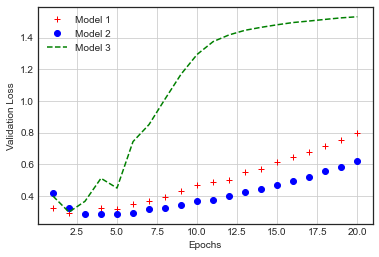

In [20]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_val_loss, 'g--', label='Model 3')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터의 손실을 보면 알 수 있음

In [33]:
model_1_hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

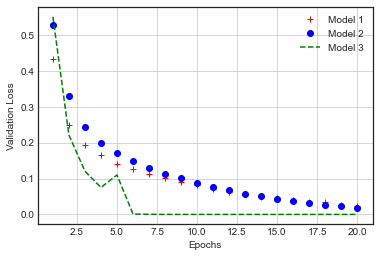

In [35]:
model_1_train_loss = model_1_hist.history['loss']
model_2_train_loss = model_2_hist.history['loss']
model_3_train_loss = model_3_hist.history['loss']

plt.plot(epochs, model_1_train_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_train_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_train_loss, 'g--', label='Model 3')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 가중치 초기화


#### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [38]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential

In [41]:
model = Sequential([Dense(30, kernel_initializer='he_normal', input_shape=[10,10]),
                    LeakyReLU(alpha=0.2),
                    Dense(1, kernel_initializer='he_normal'),
                    Activation('softmax')])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10, 30)            330       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 30)            0         
                                                                 
 dense_4 (Dense)             (None, 10, 1)             31        
                                                                 
 activation (Activation)     (None, 10, 1)             0         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### 고속 옵티마이저

#### 모멘텀 최적화

$
\qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \ v
$

  - $\alpha\ $ : 관성계수 

  - $v$ :  속도

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

In [43]:
import tensorflow as tf 
from tensorflow.keras.optimizers import SGD 

In [44]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)

#### 네스테로프 (Nesterov)

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함

- 시간이 지날수록 조금 더 빨리 최솟값에 도달

$
\qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
\qquad \theta \ \leftarrow \ \theta \ + m
$


  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\eta\ $ : 학습률

  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

  <img src="https://t1.daumcdn.net/cfile/tistory/99D91C455C76428D11">

  <sub>출처: CS231n</sub>

In [45]:
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

#### AdaGrad

- 보통 간단한 모델에는 효과 좋을 수는 있으나, 심층 신경망 모델에서는 사용 X

$
\qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
$

  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분


In [46]:
from tensorflow.keras.optimizers import Adagrad 

In [47]:
optimizer = Adagrad(learning_rate=0.001)

#### RMSProp


$
\qquad s \ \leftarrow \ \beta \ s + (1 - \beta) \bigtriangledown_{\theta} J(\theta) \otimes \bigtriangledown_{\theta} J(\theta) \\
\qquad \theta \ \leftarrow \ \theta \ - \eta  \ \bigtriangledown_{\theta} J(\theta) \oslash \sqrt{s + \epsilon}
$

  - $s \ $ : 그래디언트의 제곱을 감쇠율을 곱한 후 더함

  - $\eta\ $ : 학습률

  - $\bigtriangledown_{\theta} J(\theta) \ $ : 손실함수의 미분값


  

In [48]:
from tensorflow.keras.optimizers import RMSprop

In [49]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9)

#### Adam

$
\qquad m \ \leftarrow \  \beta_1 \ m - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
\qquad s \ \leftarrow \ \beta_2 \ s + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad \hat{m} \ \leftarrow \frac{m}{1 - \beta_1^t} \\
\qquad \hat{s} \ \leftarrow \frac{s}{1 - \beta_2^t} \\
\qquad W \ \leftarrow \ W \ + \gamma \ \hat{m}\  \oslash \sqrt{\hat{s} + \epsilon}
$

  - $\beta\ $ : 지수 평균의 업데이트 계수

  - $\gamma\ $ : 학습률

  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [51]:
from tensorflow.keras.optimizers import Adam

In [52]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### 배치 정규화
- 모델에 주입되는 샘플들을 균일하게 만드는 방법

- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌

- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음

- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임


In [60]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation
from tensorflow.keras.utils import plot_model

In [61]:
model = Sequential()

model.add(Dense(32, input_shape=(28*28, ), kernel_initializer='he_normal'))
model.add(BatchNormalization()),
model.add(Activation('relu'))

model.summary()

plot_model(model)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                25120     
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 규제화
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어  
  가중치가 작은 값을 가지도록 함

- 가중치의 분포가 더 균일하게 됨

- 네트워크 손실함수에 큰 가중치에 연관된 비용을 추가
  - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 2규제가 합쳐진 경우도 존재

데이터는 **모델의 크기** 파트에서 사용된 imdb dataset

In [62]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

#### 모델 구성

In [63]:
l2_model = Sequential([Dense(16, kernel_regularizer=l2(0.001), activation='relu', input_shape=(10000, )),
                       Dense(16, kernel_regularizer=l2(0.001), activation='relu'),
                       Dense(1, activation='sigmoid')])

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model.summary() 
plot_model(l2_model, show_shapes=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                160016    
                                                                 
 dense_9 (Dense)             (None, 16)                272       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### 모델 학습

In [65]:
l2_model_hist = l2_model.fit(x_train, y_train,
                epochs=20,
                batch_size=512,
                validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1924 - acc: 0.9504 - val_loss: 0.4562 - val_acc: 0.8559
Epoch 2/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1865 - acc: 0.9531 - val_loss: 0.4149 - val_acc: 0.8696
Epoch 3/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1879 - acc: 0.9526 - val_loss: 0.4146 - val_acc: 0.8698
Epoch 4/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1879 - acc: 0.9524 - val_loss: 0.4202 - val_acc: 0.8681
Epoch 5/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1799 - acc: 0.9557 - val_loss: 0.4255 - val_acc: 0.8678
Epoch 6/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1836 - acc: 0.9539 - val_loss: 0.4279 - val_acc: 0.8667
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1837 - acc: 0.9525 - val_loss: 0.4307 - val_acc: 0.8656
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1755 - a

#### 시각화
- Model 1은 **모델의 크기 축소**파트에서의 모델

In [67]:
l2_model_hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

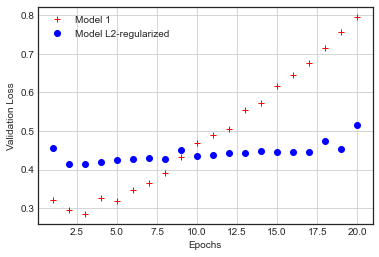

In [69]:
l2_model_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Model L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### L1과 비교

In [70]:
l1_model = Sequential([Dense(16, kernel_regularizer=l1(0.0001), activation='relu', input_shape=(10000, )),
                       Dense(16, kernel_regularizer=l1(0.0001), activation='relu'),
                       Dense(1, activation='sigmoid')])

l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l1_model.summary() 
plot_model(l1_model, show_shapes=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                160016    
                                                                 
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [71]:
l1_model_hist = l1_model.fit(x_train, y_train,
                epochs=20,
                batch_size=512,
                validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 24ms/step - loss: 0.5607 - acc: 0.8185 - val_loss: 0.4392 - val_acc: 0.8708
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3768 - acc: 0.8918 - val_loss: 0.3724 - val_acc: 0.8878
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3329 - acc: 0.9058 - val_loss: 0.4061 - val_acc: 0.8623
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3157 - acc: 0.9086 - val_loss: 0.3708 - val_acc: 0.8813
Epoch 5/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3030 - acc: 0.9150 - val_loss: 0.3679 - val_acc: 0.8834
Epoch 6/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2967 - acc: 0.9174 - val_loss: 0.3881 - val_acc: 0.8730
Epoch 7/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2888 - acc: 0.9202 - val_loss: 0.3631 - val_acc: 0.8845
Epoch 8/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2807 - a

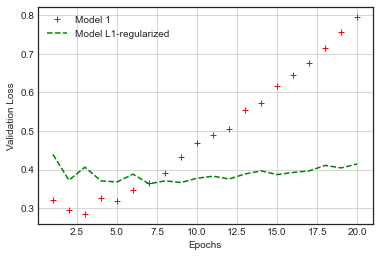

In [75]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'g--', label='Model L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

3가지 모델 비교
- Original
- L1
- L2

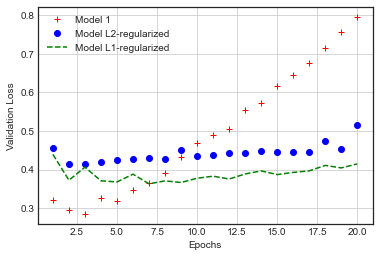

In [76]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Model L2-regularized')
plt.plot(epochs, l1_model_val_loss, 'g--', label='Model L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### L1, L2와 비교

In [77]:
l1_l2_model = Sequential([Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), activation='relu', input_shape=(10000, )),
                       Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), activation='relu'),
                       Dense(1, activation='sigmoid')])

l1_l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l1_l2_model.summary() 
plot_model(l1_l2_model, show_shapes=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                160016    
                                                                 
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [78]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                epochs=20,
                batch_size=512,
                validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 27ms/step - loss: 0.5726 - acc: 0.8156 - val_loss: 0.4383 - val_acc: 0.8748
Epoch 2/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3817 - acc: 0.8927 - val_loss: 0.3806 - val_acc: 0.8834
Epoch 3/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3421 - acc: 0.8990 - val_loss: 0.3657 - val_acc: 0.8862
Epoch 4/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3210 - acc: 0.9089 - val_loss: 0.3608 - val_acc: 0.8863
Epoch 5/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3132 - acc: 0.9116 - val_loss: 0.3654 - val_acc: 0.8834
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.3053 - acc: 0.9158 - val_loss: 0.3633 - val_acc: 0.8861
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2982 - acc: 0.9182 - val_loss: 0.4171 - val_acc: 0.8604
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2952 - a

4가지 모델 비교
- Original

- L1

- L2

- L1_L2

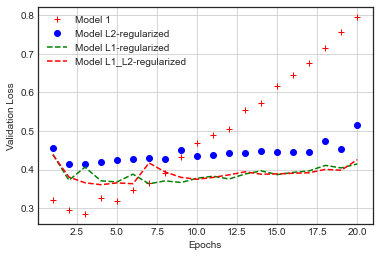

In [79]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Model L2-regularized')
plt.plot(epochs, l1_model_val_loss, 'g--', label='Model L1-regularized')
plt.plot(epochs, l1_l2_model_val_loss, 'r--', label='Model L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 드롭아웃(Dropout)
- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법

- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜**  
    $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]

  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨

- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않는다.
  - 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

In [80]:
from tensorflow.keras.layers import Dropout

#### 모델 구성

In [81]:
dropout_model = Sequential([Dense(16, activation='relu', input_shape=(10000, )),
                            Dropout(0.5),
                            Dense(16, activation='relu'),
                            Dropout(0.5),
                            Dense(1, activation='sigmoid')])

dropout_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

dropout_model.summary() 
plot_model(dropout_model, show_shapes=True)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) an

#### 모델 학습

In [82]:
dropout_model_hist = dropout_model.fit(x_train, y_train,
                epochs=20,
                batch_size=512,
                validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 25ms/step - loss: 0.6062 - acc: 0.6769 - val_loss: 0.4766 - val_acc: 0.8588
Epoch 2/20
49/49 [==============================] - 1s 14ms/step - loss: 0.4628 - acc: 0.8020 - val_loss: 0.3504 - val_acc: 0.8804
Epoch 3/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3728 - acc: 0.8548 - val_loss: 0.2979 - val_acc: 0.8872
Epoch 4/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3159 - acc: 0.8840 - val_loss: 0.2831 - val_acc: 0.8854
Epoch 5/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2762 - acc: 0.9024 - val_loss: 0.2764 - val_acc: 0.8884
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2412 - acc: 0.9151 - val_loss: 0.2819 - val_acc: 0.8869
Epoch 7/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2208 - acc: 0.9202 - val_loss: 0.3042 - val_acc: 0.8845
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1982 - a

#### 시각화

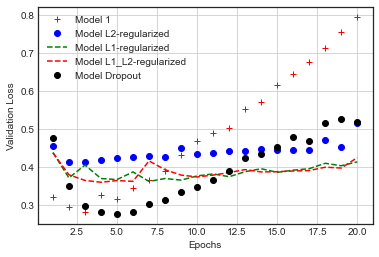

In [83]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Model L2-regularized')
plt.plot(epochs, l1_model_val_loss, 'g--', label='Model L1-regularized')
plt.plot(epochs, l1_l2_model_val_loss, 'r--', label='Model L1_L2-regularized')
plt.plot(epochs, dropout_model_val_loss, 'ko', label='Model Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()